In [90]:
# Instalamos lo necesario
# !pip install matplotlib scikit-image opencv-python numpy

In [91]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2

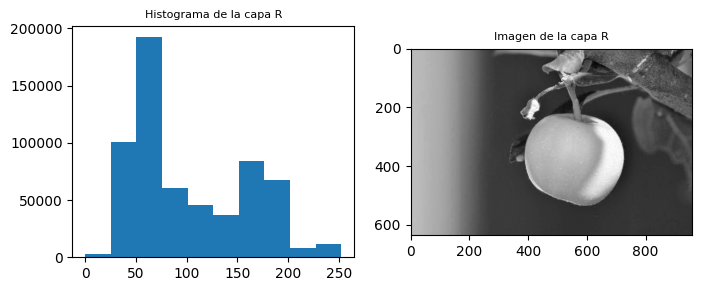

In [113]:
# Cargamos la imagen
manzana = io.imread('img/manzana.jpg')

# Obtenemos las capas RGB de la imagen
ImR = manzana[:,:,0]
ImG = manzana[:,:,1]
ImB = manzana[:,:,2]

# Graficamos el histograma y la imagen de la capa R
counts, bin_edges = np.histogram(ImR, bins=100)
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].hist(bin_edges[:-1], weights=counts)
axs[0].set_title('Histograma de la capa R',fontsize=8)
axs[1].imshow(ImR, cmap='gray')
axs[1].set_title('Imagen de la capa R',fontsize=8)
plt.show()

In [115]:
# Binarizamos las imágenes
imBinarizada = ImR > 150
imBinarizada2 = ImG < 110

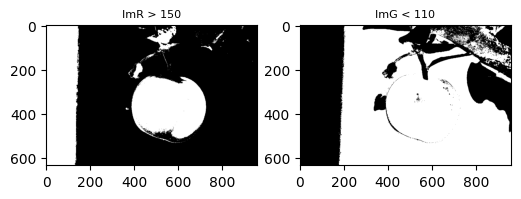

In [116]:
# Graficamos las imágenes
fig, axs = plt.subplots(1,2, figsize=(6,3))
axs[0].imshow(imBinarizada, cmap='gray')
axs[0].set_title('ImR > 150',fontsize=8)
axs[1].imshow(imBinarizada2, cmap='gray')
axs[1].set_title('ImG < 110',fontsize=8)
plt.show()

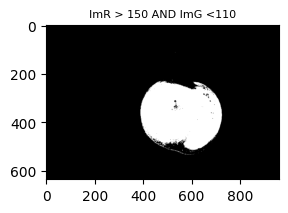

In [117]:
# Creamos la imagen resultante de la operación lógica AND
# imBinarizada3 = imBinarizada * imBinarizada2

# Otra forma:
imBinarizada3 = np.logical_and(imBinarizada, imBinarizada2)

# Graficamos la imagen resultante
plt.figure(figsize=(3,2))
plt.imshow(imBinarizada3, cmap='gray')
plt.title('ImR > 150 AND ImG <110',fontsize=8)
plt.show()

Segundo segmento de código: erosion y dilatación

<Figure size 300x200 with 0 Axes>

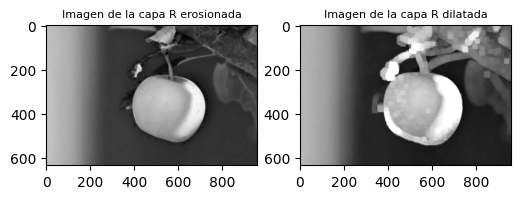

In [119]:
# Colocamos un kernel (matriz de selección de expansión)
kernel = np.ones((8,8), np.uint8)

# Erosionamos la imagen en la capa roja con el kernel definido a una iteración
ImErosion = cv2.erode(ImR, kernel, iterations=1)
plt.figure(figsize=(3,2))

# Dilatamos la imagen en la capa roja con el kernel definido a una iteracion
kernel = np.ones((20,20), np.uint8)
ImDilat = cv2.dilate(ImR, kernel, iterations=1)

# Graficamos las imágenes
fig, axs = plt.subplots(1,2, figsize=(6,3))
axs[0].imshow(ImErosion, cmap='gray')
axs[0].set_title('Imagen de la capa R erosionada',fontsize=8)
axs[1].imshow(ImDilat, cmap='gray')
axs[1].set_title('Imagen de la capa R dilatada',fontsize=8)
plt.show()